In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def display_img(img):
    plt.imshow(img, cmap='gray')  # Use cmap='gray' to display the image in grayscale
    plt.axis('off')  # Turn off axis labels
    plt.show()

In [3]:
def display_line(data, ylim=None, hline=None):
    plt.figure(figsize=(2, 2))
    plt.plot(range(len(data)), data)
    plt.ylim(bottom=0)
    if not (ylim is None):
        plt.ylim(top=ylim)
    if not (hline is None):
        plt.axhline(y=hline)
    plt.show()

In [4]:
filepath = "chopstick_plant.jpg"

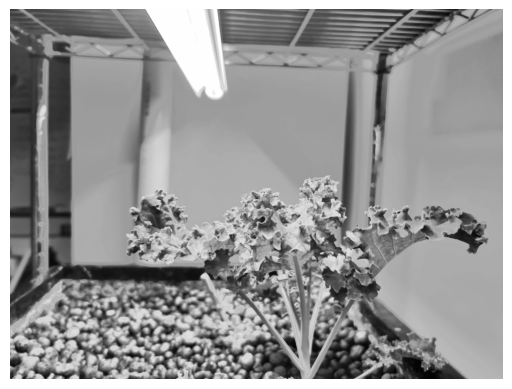

In [22]:
def read_img(filepath):
    img = cv.imread(filepath, cv.IMREAD_GRAYSCALE)
    if img is None:
        raise Exception("reading image failed")
    else:
        return img

raw_img = read_img(filepath)
display_img(raw_img)

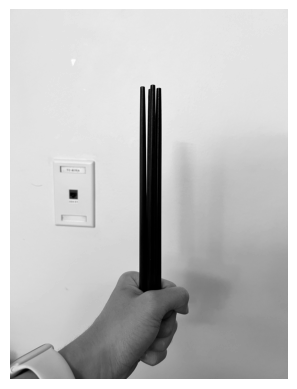

In [6]:
def smooth_img(img):
    return cv.GaussianBlur(img, (5, 5), 0)

smoothed_img = smooth_img(raw_img)
display_img(smoothed_img)

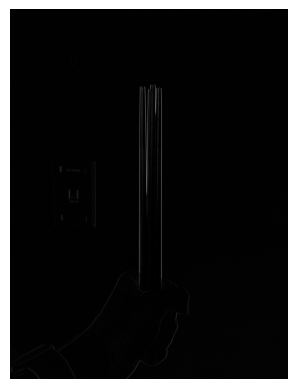

In [7]:
def take_abs_diff(img):
    return np.uint8(np.abs(np.diff(np.int8(img))))

abs_diff = take_abs_diff(smoothed_img)
display_img(abs_diff)

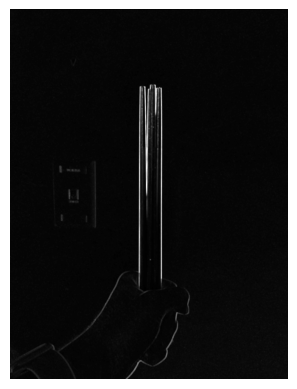

In [19]:
def dilate_img(img):
    return cv.dilate(img, kernel=np.ones((11, 11)), iterations=1)

dilated = dilate_img(abs_diff)
display_img(dilated)

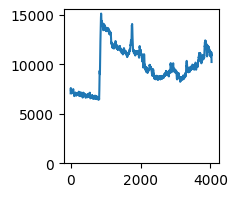

In [20]:
def calc_var_over_rows(img):
    return np.sum(img, axis=-1)

variation_over_rows = calc_var_over_rows(dilated)
display_line(variation_over_rows)

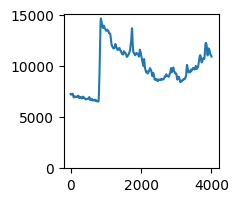

In [21]:
def gaussian_filter(kernel_size, sigma):
    kernel = np.fromfunction(
        lambda x: (1 / (np.sqrt(2 * np.pi) * sigma)) * np.exp(-((x - (kernel_size - 1) / 2) ** 2) / (2 * sigma ** 2)),
        (kernel_size,)
    )
    return kernel / np.sum(kernel)  # Normalize the kernel to ensure the sum is 1
kernel = gaussian_filter(30, 10)
def smooth_line(data):
    return np.convolve(data, kernel, mode='valid')

smoothed_line = smooth_line(variation_over_rows)
display_line(smoothed_line)

# Putting it all together:

In [24]:
smoothing_kernel_size = 11
def variation_vs_height(filepath):
    raw_img = read_img(filepath)
    smoothed_img = smooth_img(raw_img)
    abs_diff = take_abs_diff(smoothed_img)
    dilated = dilate_img(abs_diff)
    variation_over_rows = calc_var_over_rows(dilated)
    smoothed_line = smooth_line(variation_over_rows)
    return smoothed_line

chopstick_plant.jpg


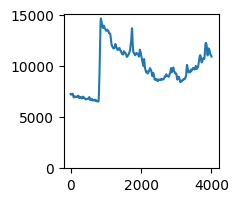

plant_cropped.jpg


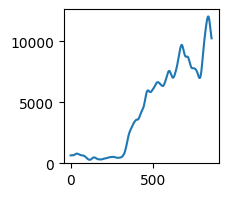

plant.jpg


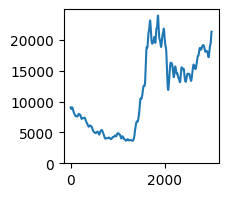

In [26]:
for filepath in ["chopstick_plant.jpg", "plant_cropped.jpg", "plant.jpg"]:
    try:
        print(filepath)
        display_line(variation_vs_height(filepath))
    except e:
        print(e)